In [34]:
import numpy as np
from time import strftime
import matplotlib.pyplot as plt
from get_matching_eff import read_tar
import mplhep
plt.style.use(mplhep.style.ROOT)

In [2]:
mzs, n_genjetpt_pass, n_genjetpt_fail, n_submitted, matching_eff, genjetpt_eff \
    = read_tar('matching_eff_job_logs_Oct12.tar')

Reading matching_eff_job_logs_Oct12.tar
  Reading qondor_qondorgen_20211012_215746/err_cluster44_34887149_44.txt
    Failed
  Reading qondor_qondorgen_20211012_215746/err_cluster41_34887149_41.txt
    Failed
  Reading qondor_qondorgen_20211012_215746/err_cluster45_34887149_45.txt
    Failed
  Reading qondor_qondorgen_20211012_215746/err_cluster47_34887149_47.txt
    Failed
  Reading qondor_qondorgen_20211012_215746/err_cluster42_34887149_42.txt
    Failed
  Reading qondor_qondorgen_20211012_215746/err_cluster46_34887149_46.txt
    Failed
  Reading qondor_qondorgen_20211012_215746/err_cluster43_34887149_43.txt
    Failed
  Reading qondor_qondorgen_20211012_215746/err_cluster49_34887149_49.txt
    Failed
  Reading qondor_qondorgen_20211012_215746/err_cluster48_34887149_48.txt
    Failed
  Reading qondor_qondorgen_20211012_215746/err_cluster50_34887149_50.txt
    Failed
  Reading qondor_qondorgen_20211012_215746/err_cluster31_34887149_31.txt
  Reading qondor_qondorgen_20211012_215746/err_

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


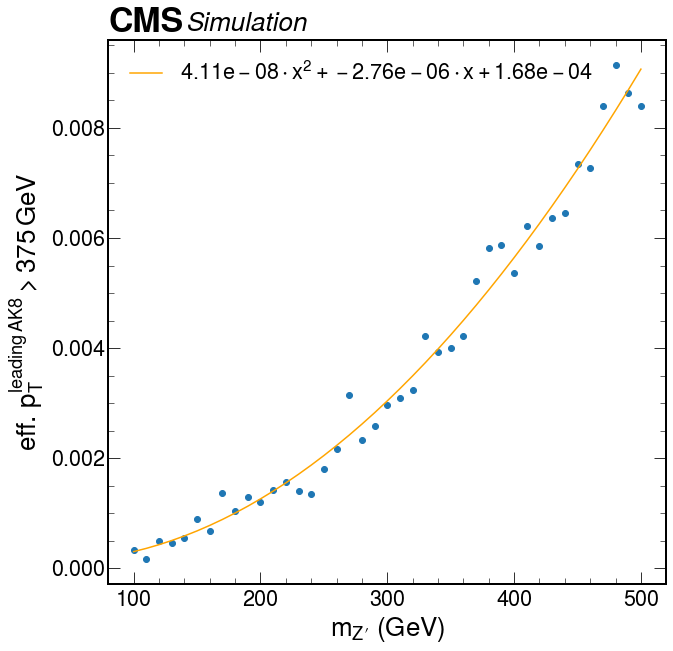

In [28]:
fit = np.polyfit(mzs, genjetpt_eff, 2)
f = np.poly1d(fit)

fig = plt.figure()
ax = fig.gca()
ax.scatter(mzs, genjetpt_eff)
ax.plot(mzs, f(mzs), c='orange', label=f'${fit[0]:.2e}\cdot x^{{2}}+{fit[1]:.2e}\cdot x+{fit[2]:.2e}$')
mplhep.cms.text('Simulation')
ax.set_ylabel(r'eff. $p^{leading\,AK8}_{T} > 375\,GeV$')
ax.set_xlabel(r'$m_{Z\prime}$ (GeV)')
ax.legend()

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


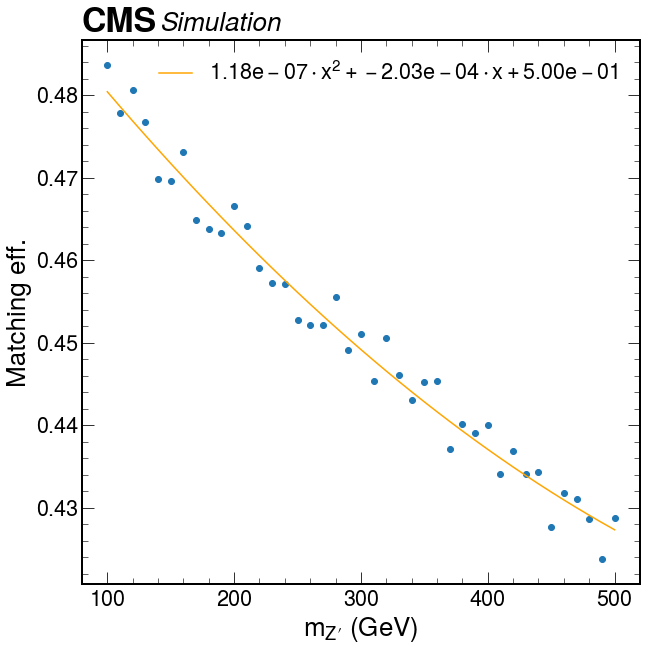

In [32]:
fitm = np.polyfit(mzs, matching_eff, 2)
fm = np.poly1d(fitm)

fig = plt.figure()
ax = fig.gca()
ax.scatter(mzs, matching_eff)
ax.plot(mzs, fm(mzs), c='orange', label=f'${fitm[0]:.2e}\cdot x^{{2}}+{fitm[1]:.2e}\cdot x+{fitm[2]:.2e}$')
mplhep.cms.text('Simulation')
ax.set_ylabel(r'Matching eff.')
ax.set_xlabel(r'$m_{Z\prime}$ (GeV)')
ax.legend()

In [37]:
np.savez(
    strftime('efficiencies_%b%d.npz'),
    mzs=mzs,
    matching_eff=matching_eff,
    matching_eff_fit=fm(mzs),
    genjetpt_eff=genjetpt_eff,
    genjetpt_eff_fit=f(mzs)
    )